In [160]:
import pandas as pd
import numpy as np
from math import sqrt

from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing,datasets, svm

import matplotlib.pyplot as plt

In [161]:
bank_df = pd.read_csv('Universalbank.csv') 

In [162]:
Xs = bank_df.drop(columns=['Personal Loan', 'ZIP Code', 'ID']) #set predictor data excluding Zip Code and ID
y = bank_df['Personal Loan'] #set prediction target

In [163]:
X = scale(Xs) #preprocess data by scaling 

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) #setting test split of 40% data

In [165]:
knn = KNeighborsClassifier(n_neighbors=1) #set nearest neighbors to 1
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=1)

In [166]:
accuracy = knn.score(X_test, y_test) #check accuracy of model
print(accuracy)

0.962


In [167]:
pred = knn.predict(X_test)
print(knn.predict(X_test))

[0 0 0 ... 0 0 0]


In [168]:
print(confusion_matrix(y_test,pred)) #confusion matrix shows 12 false positigves and 59 false negatives

[[1799   23]
 [  53  125]]


In [169]:
error_rate = []  #test range of 1-20 k values to see which has lowest error rate
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error Rate')

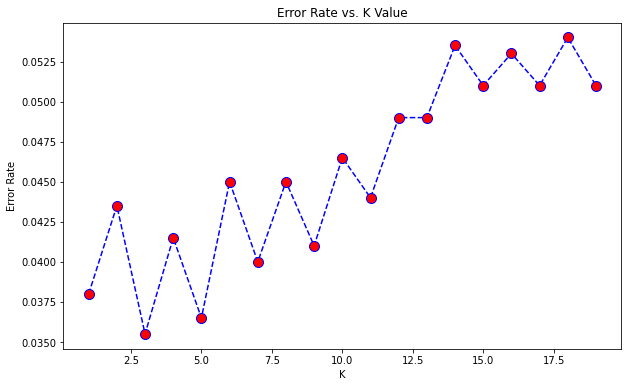

In [170]:
plt.figure(figsize=(10,6)) #plot graph for lowest k value across 20 k values
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [171]:
#graph shows the best k fit being at 5 where numbers past 5 display overfitting

In [172]:
example = np.array([40, 10, 84, 2, 2, 2, 0, 0, 0, 1, 1]) #test data from worksheet ('Age': 40, 'Experience': 10, 'Income': 84, 'Family': 2, 
                                                               #'CCAvg': 2, 'Education': 2, 'Mortgage': 0, 'Securities Account': 0, 'CD Account': 0,
                                                               #'Online': 1, Credit Card': 1)

In [173]:
example = example.reshape(1,-1) #address error with data shape

In [174]:
norm = np.linalg.norm(example) #normalize data to fit model

In [175]:
prediction = knn.predict(example) #show prediction of example set with cutoff of .5
if prediction > .5:
    print("Accept")

Accept


In [176]:
knn = KNeighborsClassifier(n_neighbors=3) #setting k to 3 for optimum prediction ability
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [177]:
prediction = knn.predict(example) #show prediction of example
if prediction > .5:
    print("Accept")

Accept


In [178]:
scores = cross_val_score(knn, X, y, scoring='accuracy')

In [179]:
print(scores)

[0.962 0.964 0.963 0.952 0.96 ]


In [180]:
def split_stratified_into_train_val_test(bank_df, stratify_colname='y', frac_train=0.5, 
                                         frac_val=0.30, frac_test=0.2, random_state=None):
    X = bank_df
    y = bank_df[['Personal Loan']]  #split data 50/30/20 for new Knn test

In [181]:
knn = KNeighborsClassifier(n_neighbors=3) #using the new data split to test example customer
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [182]:
prediction = knn.predict(example) #Customer excepts with new data split
if prediction > .5:
    print("Accept")

Accept


In [183]:
pred = knn.predict(X_test)

In [184]:
print(confusion_matrix(y_test,pred)) #confusion matrix shows far less FP but a couple more FN

[[1815    7]
 [  64  114]]


In [185]:
example = np.array([40, 10, 84, 2, 2, 2, 0, 0, 0, 1, 1]) #test data from worksheet ('Age': 40, 'Experience': 10, 'Income': 84, 'Family': 2, 
                                                               #'CCAvg': 2, 'Education': 2, 'Mortgage': 0, 'Securities Account': 0, 'CD Account': 0,
                                                               #'Online': 1, Credit Card': 1)

In [186]:
example = example.reshape(1,-1) #address error with data shape

In [187]:
norm = np.linalg.norm(example) #normalize data to fit model

In [188]:
prediction = knn.predict(example) #show prediction of example
if prediction > .5:
    print("Accept")

Accept


In [189]:
scores = cross_val_score(knn, X, y, scoring='accuracy')

In [190]:
print(scores)

[0.962 0.964 0.963 0.952 0.96 ]


In [ ]:
# the best k value is shown in the graph and was then used in the code.  The graph shows the point at where 
# underfitting and overfitting occur. There were multiple errors with data shape, data array versus dataframe, 
# and the correct dimention of data. 